# Sampling Basics 

In [45]:
from os.path import exists
file_exists = exists('basic_material.py')

if (not file_exists):
    !wget -O basic_material.py https://raw.githubusercontent.com/JonHowMIT/Signals_and_Systems/main/basic_material.py
%run basic_material

Running Python: 3.8.17
Running Sympy: 1.12rc1


In [79]:
def alias_plot(t,ts,x,x0,x0_alias):
    Ts = ts[1]-ts[0]
    fs = 1/Ts
    freq = fftfreq(len(t), t[1]-t[0])
    freq_s = fftfreq(len(ts), Ts)
    X = fft(x)
    X0 = fft(x0)
    X0_alias = fft(x0_alias)
    
    II_X = np.argmax(X)
    II_X0 = np.argmax(X0)
    II_X0_alias = np.argmax(X0_alias)
    
    fig,ax = plt.subplots(figsize=(8,2))
    ax.axvline(x = freq[II_X],color="r",lw=6,label="$f_0=$"+str(f0))
    ax.axvline(x = -freq[II_X],color="r",lw=6)
    ax.axvline(x = freq[II_X0_alias],color="b",lw=4,ls="dashed",label="$\hat f_0=$"+str(np.round(f0_alias,3)))
    ax.axvline(x = -freq[II_X0_alias],color="b",lw=4,ls="dashed")
    ax.axvline(x = freq_s[II_X0],color="g",label="sampled")
    ax.axvline(x = -freq_s[II_X0],color="g")
    ax.axvline(x = fs/2,color="k",ls="dashed",ymax=0.75)
    ax.axvline(x = -fs/2,color="k",ls="dashed",ymax=0.75)
    ax.axvline(x = fs,color="k",ymax=0.75)
    ax.axvline(x = -fs,color="k",ymax=0.75)
    ax.axvline(x = 2*fs,color="k",ymax=0.75)
    ax.axvline(x = -2*fs,color="k",ymax=0.75)
    ax.set_xlim([-1.5,1.5])
    ax.set_xticks([-2*fs,-fs,-fs/2,fs/2,fs,2*fs],["$-2f_s$","$-f_s$","$-f_s/2$","$f_s/2$","$f_s$","$2f_s$"])
 
    rect = plt.Rectangle((-fs/2,0), fs, 1, alpha=0.4,color="grey")
    ax.add_patch(rect)

    ax.legend()
    plt.title("Alias mapping with $f_s=$"+str(fs))
    plt.show()

def time_plot(f0,f0_alias,fs,t,ts,x,x0,x0_alias,filename):
    fig,ax = plt.subplots(figsize=(8,5))
    ax.plot(t,x,'k--',lw=1,label='cts signal')
    ax.plot(ts,x0,'ro',label='samples')
    ax.plot(t,x0_alias,'b:',lw=2,label='aliased signal')
    ax.set_ylim(-1.1,1.1)
    ax.set_xlim(0,Tf-1)
    ax.set_xlabel('time',fontsize=18)
    ax.set_ylabel('amplitude',fontsize=18)
    plt.title('Sampled Data')
    if f0_alias >= 0: 
        plt.title('$f=$'+str(f0)+'Hz and $\hat f=$'+str(np.round(f0_alias,3))+'Hz',loc='left', color='k')
    else:
        plt.title('$f=$'+str(f0)+'Hz and $\hat f=$'+str(np.round(f0_alias,3))+'Hz',loc='left', color='r')
    plt.legend(loc=1)
    fig.savefig(filename, dpi=300)
    plt.show()


def alias_setup(Tf=10,Ts=1,f0=3/8):
    fs = 1/Ts
    t = np.arange(0,Tf,1e-3) # cts 
    ts = np.arange(0,Tf,Ts) # coarse sampling     
    w0 = 2*np.pi*f0 
    x = np.sin(w0*t);
    x0 = np.sin(w0*ts);    
    f0_alias = f0 - fs*np.round(f0/fs,0)
    x0_alias = np.sin(2*np.pi*f0_alias*t)
    return t,ts,x,x0,x0_alias,f0_alias

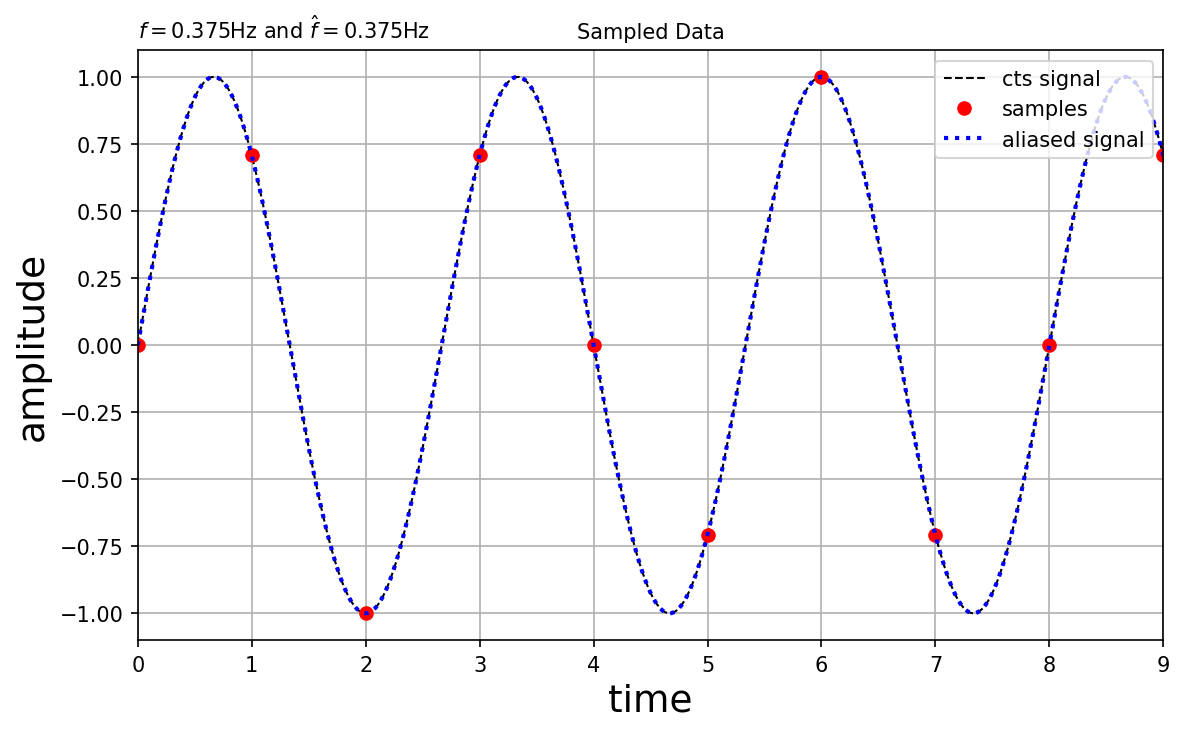

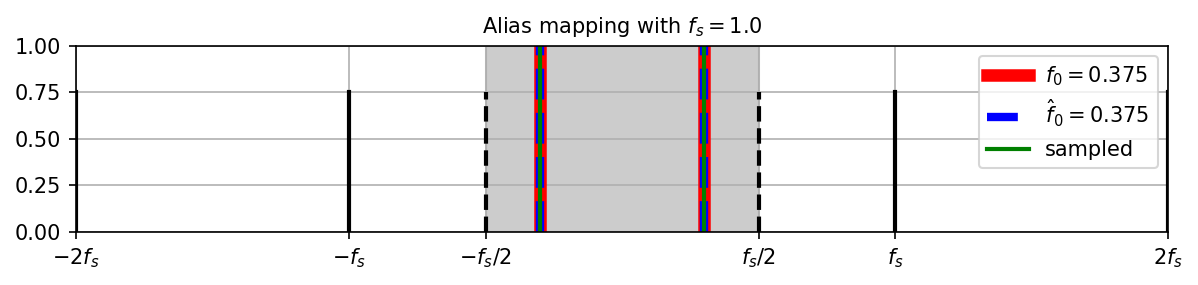

In [80]:
Ts = 1
f0 = 3/8
t,ts,x,x0,x0_alias,f0_alias = alias_setup(Tf=10,Ts=Ts,f0=f0)
time_plot(f0,f0_alias,fs,t,ts,x,x0,x0_alias,"./figs/T9_ex1.png")
alias_plot(t,ts,x,x0,x0_alias)

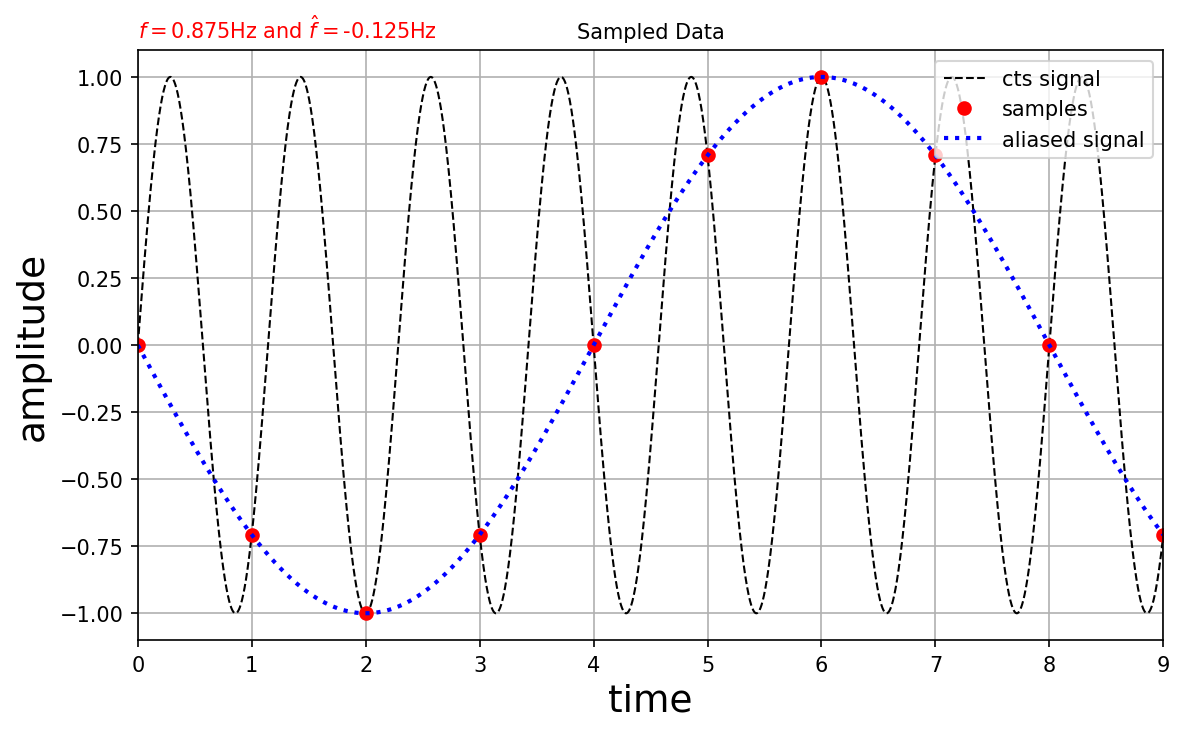

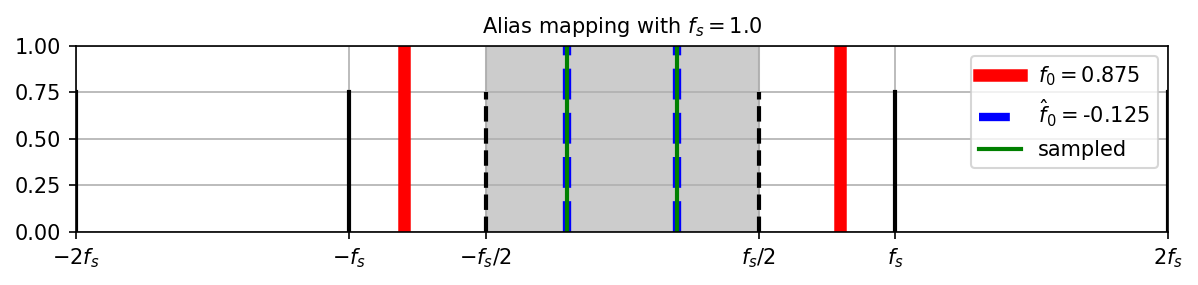

In [81]:
Ts = 1
f0 = 7/8
t,ts,x,x0,x0_alias,f0_alias = alias_setup(Tf=10,Ts=Ts,f0=f0)
time_plot(f0,f0_alias,fs,t,ts,x,x0,x0_alias,"./figs/T9_ex2.png")
alias_plot(t,ts,x,x0,x0_alias)

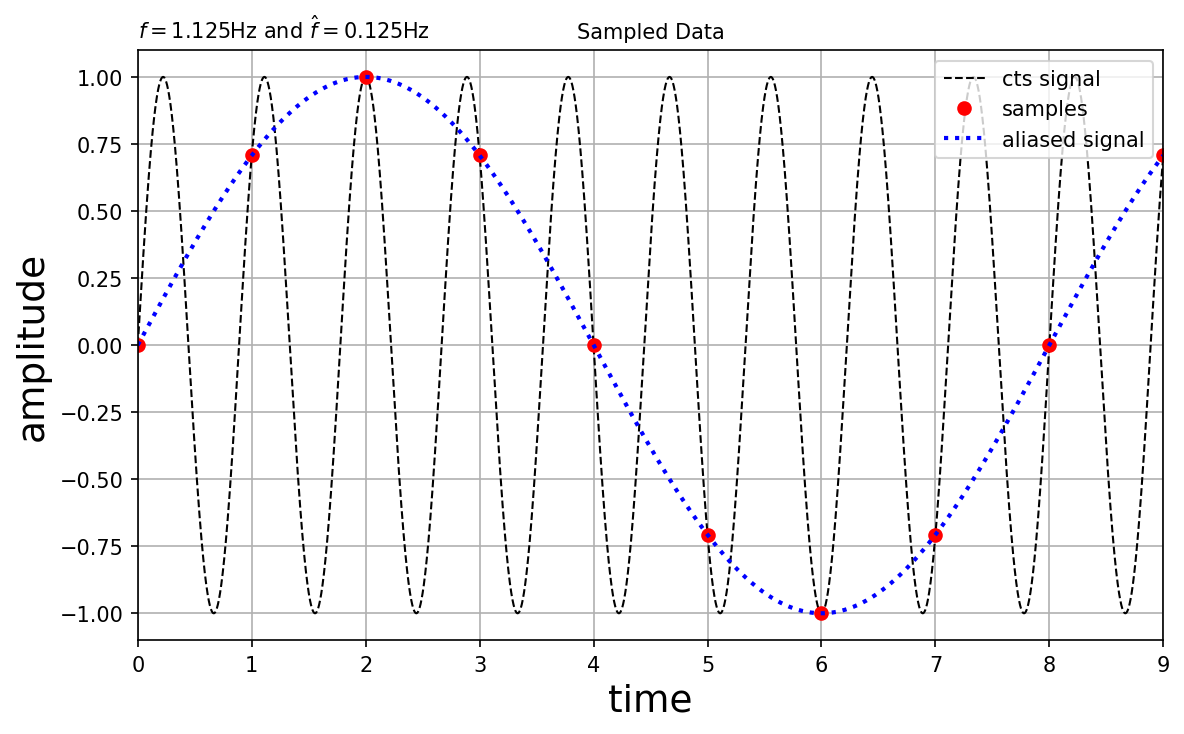

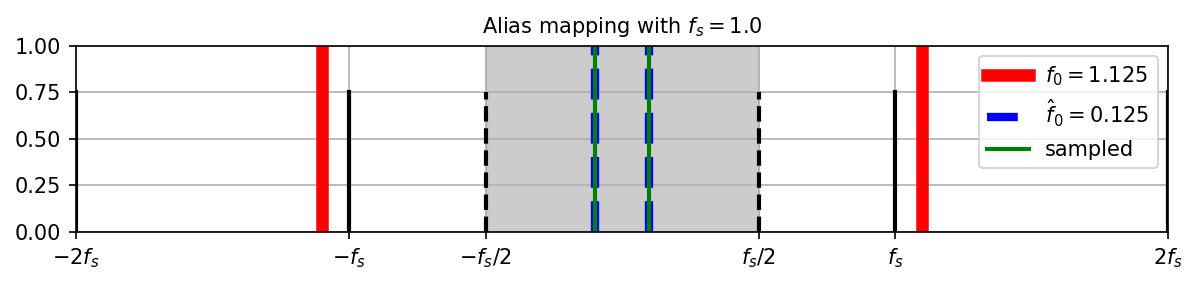

In [82]:
Ts = 1
f0 = 9/8
t,ts,x,x0,x0_alias,f0_alias = alias_setup(Tf=10,Ts=Ts,f0=f0)
time_plot(f0,f0_alias,fs,t,ts,x,x0,x0_alias,"./figs/T9_ex3.png")
alias_plot(t,ts,x,x0,x0_alias)

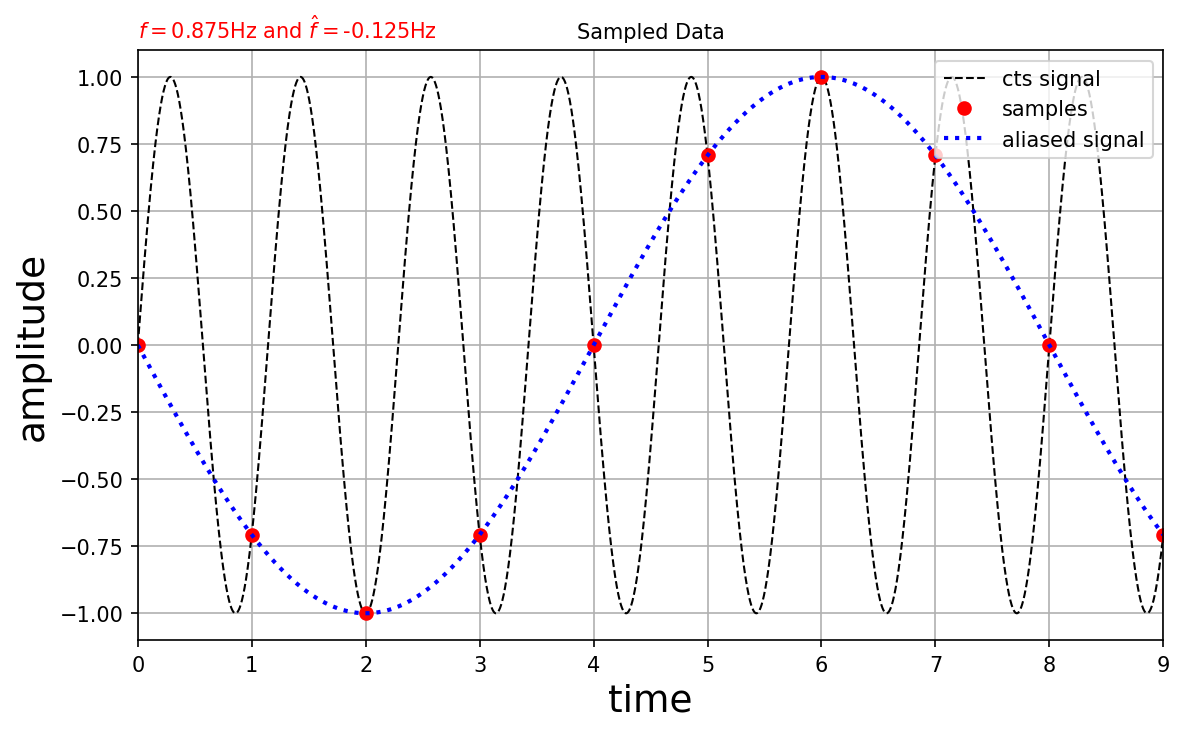

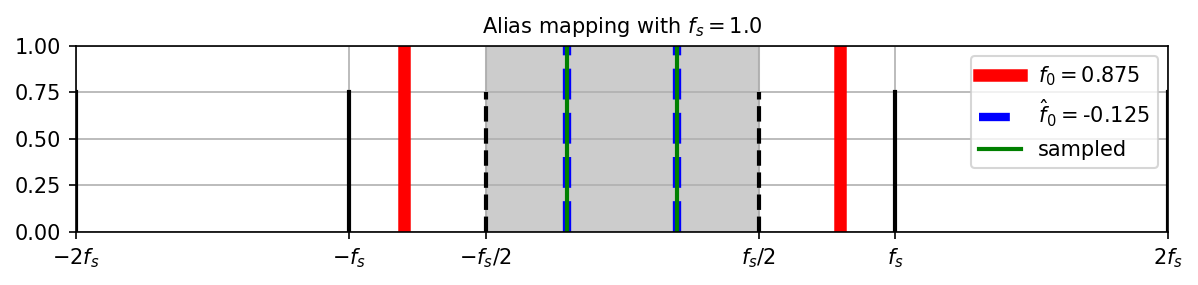

In [83]:
Ts = 1
f0 = 7/8
t,ts,x,x0,x0_alias,f0_alias = alias_setup(Tf=10,Ts=Ts,f0=f0)
time_plot(f0,f0_alias,fs,t,ts,x,x0,x0_alias,"./figs/T9_ex4.png")
alias_plot(t,ts,x,x0,x0_alias)